In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df_filtered = df[['id', 'price', 'bedrooms','floors','sqft_living','yr_built']]
df_filtered.head()

,id,price,bedrooms,floors,sqft_living,yr_built
0,7129300520,221900.0,3,1.0,1180,1955
1,6414100192,538000.0,3,2.0,2570,1951
2,5631500400,180000.0,2,1.0,770,1933
3,2487200875,604000.0,4,1.0,1960,1965
4,1954400510,510000.0,3,1.0,1680,1987


In [15]:
df_filtered['Age of Home'] = (2020 - df_filtered['yr_built']) + 20
df_filtered['Price (1000s dollars)'] = df_filtered['price'] / 1000
df_filtered['floors'] = df_filtered['floors'].astype(int)
df_filtered.rename(columns={'id':'Id','floors': 'Number of Floors','bedrooms':'Number of Bedrooms','sqft_living':'Size (sqft)'}, inplace=True)
df_filtered.head()

C:\Users\abc\AppData\Local\Temp\ipykernel_5000\2786259548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age of Home'] = (2020 - df_filtered['yr_built']) + 20
C:\Users\abc\AppData\Local\Temp\ipykernel_5000\2786259548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price (1000s dollars)'] = df_filtered['price'] / 1000
C:\Users\abc\AppData\Local\Temp\ipykernel_5000\2786259548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Id,price,Number of Bedrooms,Number of Floors,Size (sqft),yr_built,Age of Home,Price (1000s dollars)
0,7129300520,221900.0,3,1,1180,1955,85,221.9
1,6414100192,538000.0,3,2,2570,1951,89,538.0
2,5631500400,180000.0,2,1,770,1933,107,180.0
3,2487200875,604000.0,4,1,1960,1965,75,604.0
4,1954400510,510000.0,3,1,1680,1987,53,510.0


In [16]:
df_filtered = df_filtered[['Id', 'Size (sqft)', 'Number of Bedrooms','Number of Floors','Age of Home','Price (1000s dollars)']]
df_filtered.head()

,Id,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,7129300520,1180,3,1,85,221.9
1,6414100192,2570,3,2,89,538.0
2,5631500400,770,2,1,107,180.0
3,2487200875,1960,4,1,75,604.0
4,1954400510,1680,3,1,53,510.0


In [17]:
df_filtered.to_csv("House_Data.csv", index=False)

In [18]:
df = pd.read_csv("House_Data.csv")
df.head()

,Id,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,7129300520,1180,3,1,85,221.9
1,6414100192,2570,3,2,89,538.0
2,5631500400,770,2,1,107,180.0
3,2487200875,1960,4,1,75,604.0
4,1954400510,1680,3,1,53,510.0


In [19]:
from sklearn.model_selection import train_test_split
# Assuming 'df' is your DataFrame
train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)

In [20]:
print(f"Train Size = {len(train_df)}")
print(f"Test Size = {len(test_df)}")

Train Size = 15129
Test Size = 6484


In [21]:
train_df.to_csv("House_Data_Train.csv",index = False)
test_df.to_csv("House_Data_Test.csv",index = False)

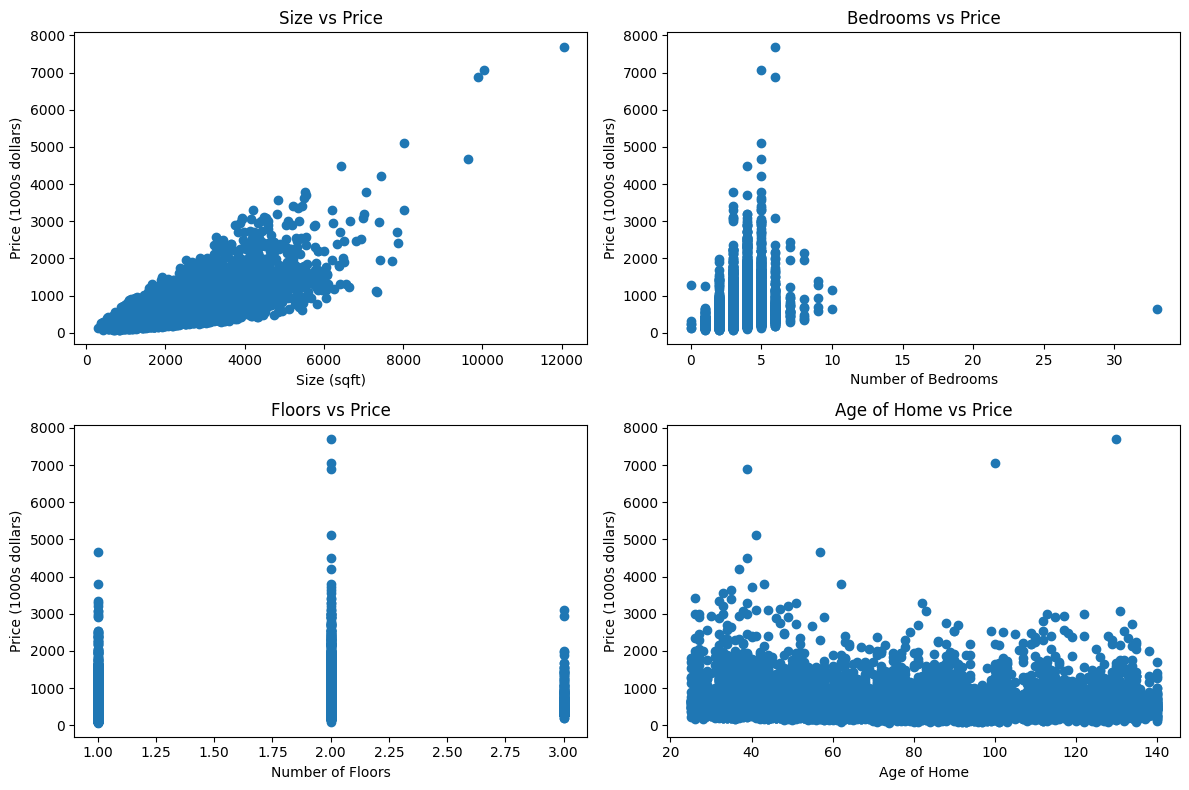

In [24]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 8))

# First subplot: Size vs Price
plt.subplot(2, 2, 1)
plt.scatter(train_df['Size (sqft)'], train_df['Price (1000s dollars)'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price (1000s dollars)')
plt.title('Size vs Price')

# Second subplot: Number of Bedrooms vs Price
plt.subplot(2, 2, 2)
plt.scatter(train_df['Number of Bedrooms'], train_df['Price (1000s dollars)'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (1000s dollars)')
plt.title('Bedrooms vs Price')

# Third subplot: Number of Floors vs Price
plt.subplot(2, 2, 3)
plt.scatter(train_df['Number of Floors'], train_df['Price (1000s dollars)'])
plt.xlabel('Number of Floors')
plt.ylabel('Price (1000s dollars)')
plt.title('Floors vs Price')

# Second subplot: Number of Bedrooms vs Price
plt.subplot(2, 2, 4)
plt.scatter(train_df['Age of Home'], train_df['Price (1000s dollars)'])
plt.xlabel('Age of Home')
plt.ylabel('Price (1000s dollars)')
plt.title('Age of Home vs Price')

# Adjust the layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()
